In [1]:
import gEconpy as ge
import numpy as np
import pandas as pd
import gEconpy.plotting as gp

In [2]:
mod = ge.model_from_gcn("../GCN Files/Sims_NK_2024.gcn")

Model Building Complete.
Found:
	16 equations
	16 variables
		The following variables were eliminated at user request:
			D_t, TC_t, T_t, U_t, Y_j_t
		The following "variables" were defined as constants and have been substituted away:
			B_t
	2 stochastic shocks
		 0 / 2 has a defined prior. 
	10 parameters
		 0 / 10 parameters has a defined prior. 
	0 parameters to calibrate.
Model appears well defined and ready to proceed to solving.



In [3]:
import pandas as pd
import numpy as np

epsilons = np.linspace(2, 20, 100)
ss_df = pd.DataFrame(
    [mod.steady_state(epsilon=epsilon, sigma=1.0) for epsilon in epsilons],
    index=epsilons,
)

<Axes: >

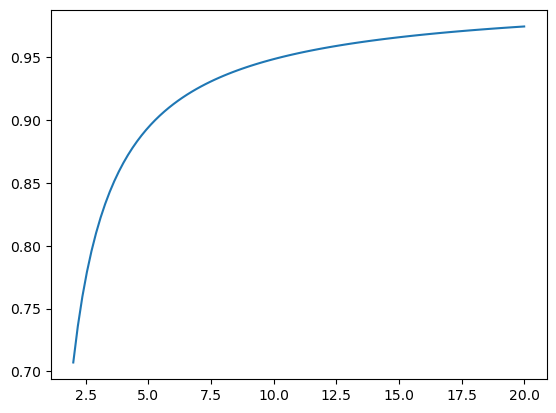

In [4]:
ss_df.Y_ss.plot()

In [5]:
g_M_values = np.linspace(-0.005, 0.01, 100)
ss_g_M = pd.DataFrame(
    [mod.steady_state(g_M=g_M, sigma=1.0) for g_M in g_M_values], index=g_M_values
)

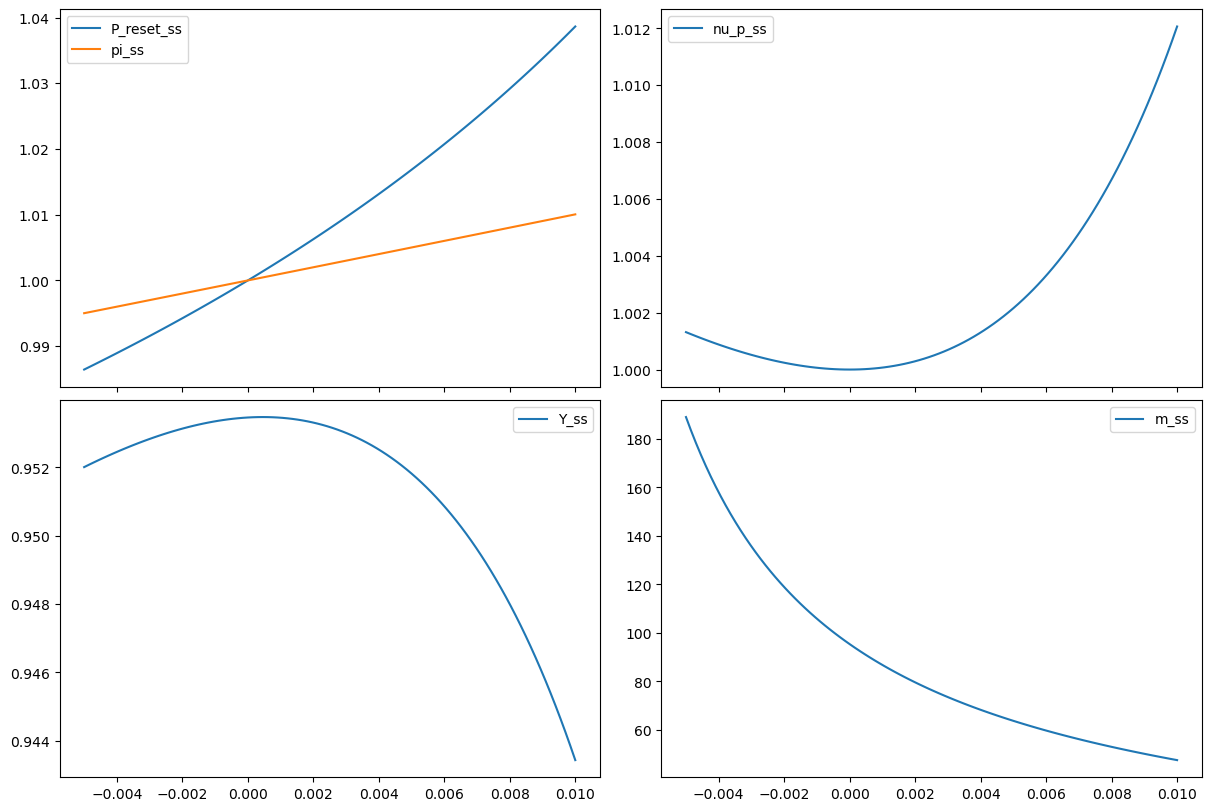

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(12, 8), sharex=True, layout="constrained")
variables = [["P_reset_ss", "pi_ss"], ["nu_p_ss"], ["Y_ss"], ["m_ss"]]
for vars, axis in zip(variables, fig.axes):
    ss_g_M[vars].plot(ax=axis)
plt.show()

In [7]:
irf_params = {
    "beta": 0.99,
    "sigma": 3.0,
    "chi": 1,
    "theta": 1,
    "phi": 3 / 4,
    "epsilon": 11,
    "psi": 1,
    "g_M": 0.0,
    "rho_M": 0.5,
    "rho_A": 0.9,
}
irf = ge.impulse_response_function(
    mod,
    **irf_params,
    shock_size={"epsilon_A": 0.01, "epsilon_M": 0.01},
    simulation_length=20,
    log_linearize=True,
)

The following variables had steady-state values close to zero and will not be log-linearized:['g_M_t']
Solution found, sum of squared residuals: 0.000000000
Norm of deterministic part: 0.000000000
Norm of stochastic part:    0.000000000


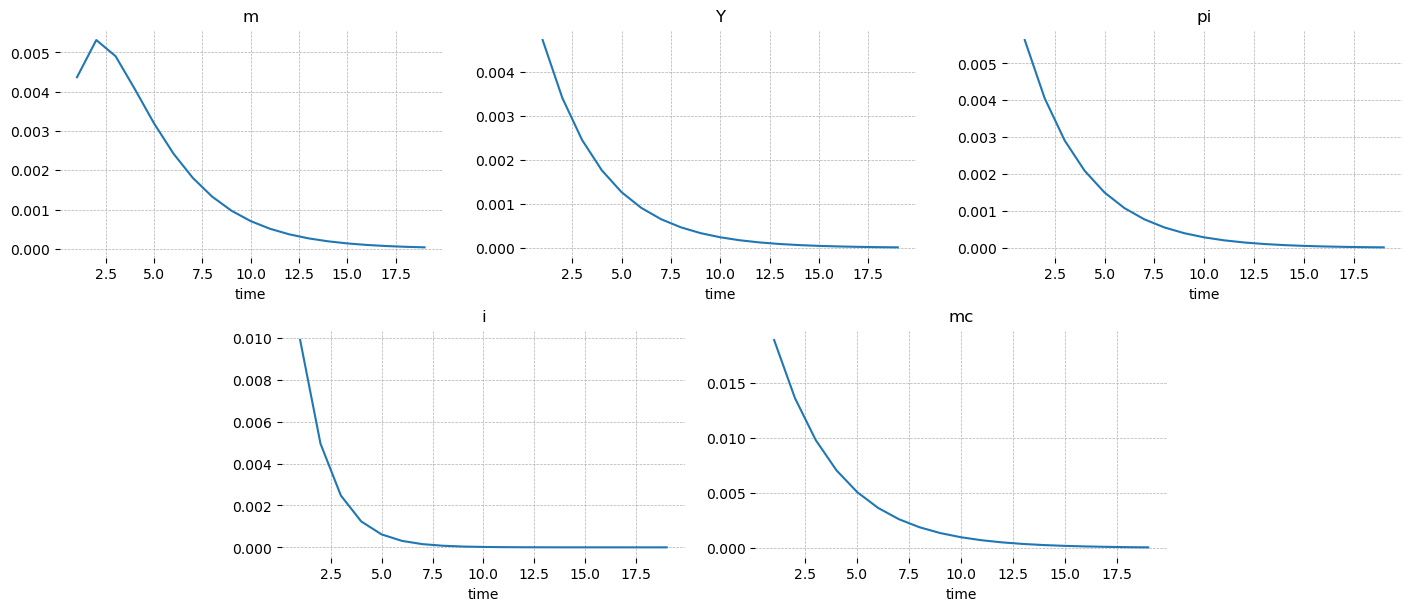

In [8]:
import gEconpy.plotting as gp

gp.plot_irf(
    irf.isel(time=slice(1, None)),
    vars_to_plot=["m", "Y", "pi", "i", "mc"],
    shocks_to_plot=["epsilon_M"],
    n_cols=3,
    figsize=(14, 6),
);

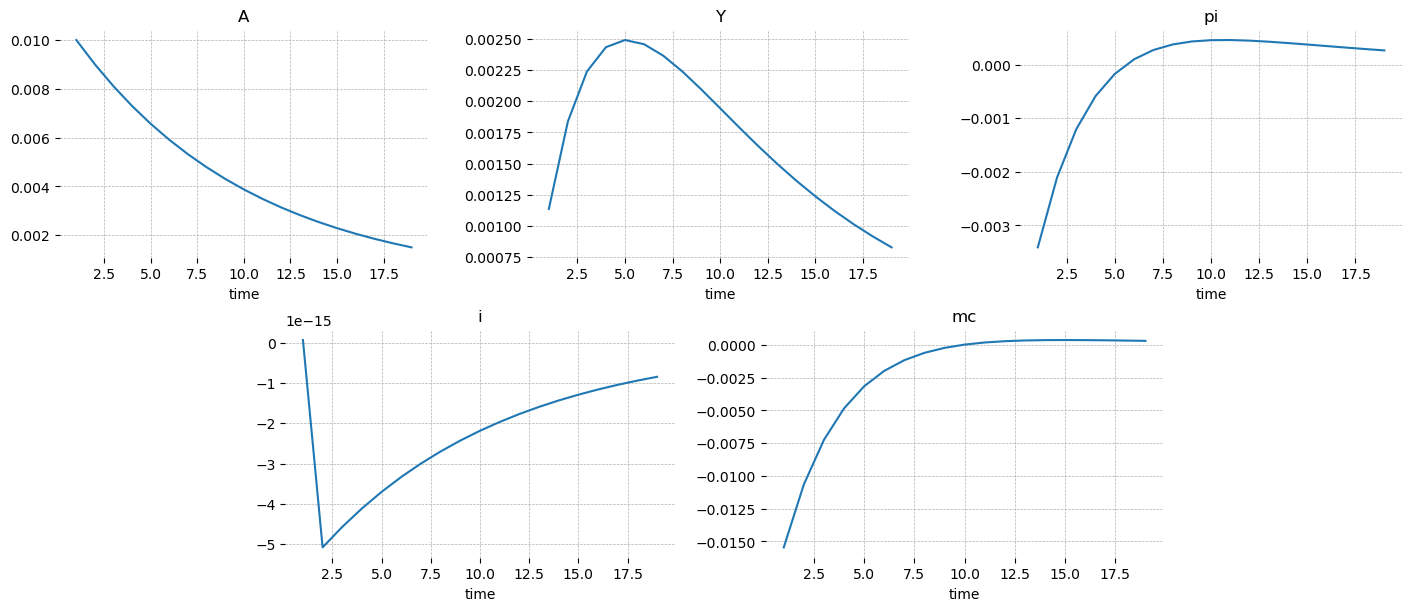

In [9]:
gp.plot_irf(
    irf.isel(time=slice(1, None)),
    vars_to_plot=["A", "Y", "pi", "i", "mc"],
    shocks_to_plot=["epsilon_A"],
    n_cols=3,
    figsize=(14, 6),
);

In [10]:
irf_params

{'beta': 0.99,
 'sigma': 3.0,
 'chi': 1,
 'theta': 1,
 'phi': 0.75,
 'epsilon': 11,
 'psi': 1,
 'g_M': 0.0,
 'rho_M': 0.5,
 'rho_A': 0.9}

In [11]:
irf_by_phi = {
    f"phi = {phi}": ge.impulse_response_function(
        mod,
        **(irf_params | {"phi": phi, "g_M": 0.001}),
        shock_size={"epsilon_A": 0.01, "epsilon_M": 0.01},
        simulation_length=20,
        log_linearize=True,
        verbose=False,
    ).isel(time=slice(1, None))
    for phi in [0, 0.75, 0.9]
}

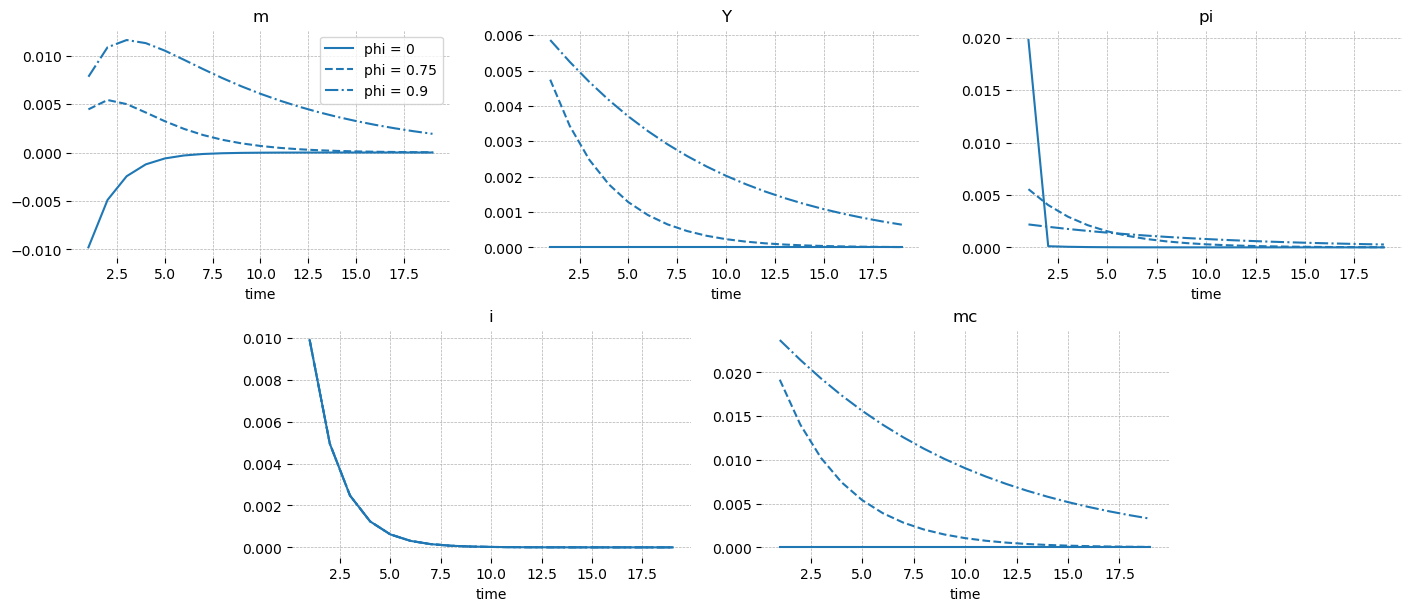

In [12]:
gp.plot_irf(
    irf_by_phi,
    vars_to_plot=["m", "Y", "pi", "i", "mc"],
    shocks_to_plot=["epsilon_M"],
    n_cols=3,
    figsize=(14, 6),
);

In [13]:
T, R = mod.solve_model(g_M=0.001, phi=0.9)

Solution found, sum of squared residuals: 0.000000000
Norm of deterministic part: 0.000000000
Norm of stochastic part:    0.000000000


In [14]:
ge.matrix_to_dataframe(T, mod)

,A,C,N,P_reset,SDF,X_hat_1,X_hat_2,Y,g_M,i,lambda,m,mc,nu_p,pi,w
A,9.000000e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.547311e-19,0.0,0.0,-3.282200e-16,0.0,9.626719e-17,0.0,0.0
C,2.676326e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.932658e-04,0.0,0.0,2.968116e-01,0.0,-1.416709e-02,0.0,0.0
N,-8.820681e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.052917e-04,0.0,0.0,3.088631e-01,0.0,9.004624e-01,0.0,0.0
P_reset,-8.024535e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.092722e-03,0.0,0.0,1.095046e+00,0.0,4.247775e-01,0.0,0.0
SDF,-8.028979e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.797973e-04,0.0,-1.0,-8.904347e-01,0.0,4.250127e-02,0.0,0.0
X_hat_1,-2.215753e+00,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,6.164420e-03,-0.0,-0.0,6.176037e+00,-0.0,1.233047e+00,-0.0,-0.0
X_hat_2,-1.413300e+00,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,5.071698e-03,-0.0,-0.0,5.080990e+00,-0.0,8.082698e-01,-0.0,-0.0
Y,2.676326e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.932658e-04,0.0,0.0,2.968116e-01,0.0,-1.416709e-02,0.0,0.0
g_M,1.908567e-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.000000e-01,0.0,0.0,-2.816331e-15,0.0,6.364406e-14,0.0,0.0
i,1.410707e-13,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,4.945650e-04,-0.0,-0.0,1.222613e-13,-0.0,-7.641329e-14,-0.0,-0.0
